# Importing necessary libraries

In [1]:
#Data manipulation,handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#nmf
from sklearn.decomposition import NMF

#Clustering Library
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [2]:
#Loading the data
df=pd.read_csv('spotify.xls')

In [3]:
df.head()

,Unnamed: 0,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
0,user_1,2,2,8,8,13,1,4,9,1,...,14,2,14,1,9,0,11,6,14,7
1,user_2,13,5,5,5,12,8,10,10,2,...,10,6,11,1,1,5,12,8,3,0
2,user_3,3,9,2,8,0,1,11,7,3,...,9,5,7,15,12,13,14,5,0,14
3,user_4,2,6,7,8,14,0,12,7,8,...,9,15,9,14,10,6,11,13,6,0
4,user_5,11,12,8,6,13,7,0,7,3,...,12,14,11,11,11,7,3,6,11,7


In [4]:
df.shape

(1000, 5001)

In [5]:
df=pd.read_csv('spotify.xls',index_col=0)

In [6]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [7]:
X=df.values
X

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

## NMF: non negative matrix factorisation

In [8]:
nmf=NMF(n_components=100,max_iter=1000,random_state=3)  #n_comp is the genres(features) in the dataset,max_iter is the no of iterations allowed in data
nmf.fit(X)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


NMF(max_iter=1000, n_components=100, random_state=3)

In [9]:
user_matrix=nmf.transform(X)
song_matrix=nmf.components_.T

In [10]:
user_matrix

array([[1.59597279, 1.63144383, 0.        , ..., 0.        , 0.        ,
        0.08842005],
       [0.        , 1.37058116, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25150672, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.86093206, ..., 0.        , 2.91063979,
        0.        ],
       [0.89111106, 0.55775866, 5.28815626, ..., 1.14447002, 0.        ,
        0.        ],
       [0.11437224, 0.3810454 , 1.17187612, ..., 0.        , 0.        ,
        0.        ]])

In [11]:
song_matrix

array([[0.09154476, 0.02084876, 0.06170426, ..., 0.20525732, 0.02089963,
        0.42266527],
       [0.29410861, 0.        , 0.01635891, ..., 0.00535885, 0.25048781,
        0.28966942],
       [0.00182988, 0.16233797, 0.00882299, ..., 0.        , 0.0265591 ,
        0.15587654],
       ...,
       [0.37753494, 0.4043987 , 0.38341127, ..., 0.        , 0.49498818,
        0.        ],
       [0.        , 0.15106911, 0.        , ..., 0.34925875, 0.46747326,
        0.36724356],
       [0.09094906, 0.15572379, 0.        , ..., 0.30544496, 0.21424152,
        0.38353537]])

In [12]:
user_matrix.shape

(1000, 100)

In [13]:
song_matrix.shape

(5000, 100)

## Steps for building a recommendation system-type1(for local library or small datasets)
1. Consider recommending songs to the first user (row location 0 in user_matrix).
2. Find the Euclidean distance between this first user and the remaining 999 users.
3. Find out top 10 songs heard by nearest five users.
4. Recommend these 10 songs to the first user

Calculating the distance between two users:

In [14]:
def col_dist(u1,u2):
    return pow(sum(pow(u1[X]-u2[X],2) for X in range(len(u1))),0.5)

In [15]:
col_dist(user_matrix[0],user_matrix[1])

17.066386601479465

Calculating distance between base user and remaining 999 users:

In [16]:
def dist_from_remaining_users(buser,user_matrix):
    dist=[]
    for i in range(len(user_matrix)):
        if buser!=i:
            dist.append(col_dist(user_matrix[buser],user_matrix[i]))
            
    return dist        

In [17]:
dist_user1=dist_from_remaining_users(0,user_matrix)

In [18]:
dist_user1

[17.066386601479465,
 15.356075620964425,
 15.860626597259172,
 15.08547803799008,
 13.8444107839774,
 14.938304994799307,
 13.25060854753765,
 16.84837011298336,
 15.14656275949025,
 15.085160716109932,
 15.426113947377875,
 15.162198319896616,
 8.915369316479866,
 16.067019686044734,
 14.192876182675565,
 12.16310373014901,
 15.342023559150528,
 15.107063798131566,
 12.398262626499156,
 13.014577302616072,
 15.558351008877825,
 15.606333530537373,
 16.157732436274276,
 16.372436321761484,
 15.742562231474452,
 15.287379336282104,
 14.678932332074202,
 13.958180490063729,
 16.353768628986337,
 16.167950463681866,
 15.592805869499824,
 15.30025556754406,
 14.813458276485697,
 14.672279075712208,
 14.96632752713232,
 14.957592291464556,
 15.289917564559385,
 15.751052100863655,
 15.536270215490791,
 13.98917649261004,
 15.584294899630587,
 14.422344103065717,
 14.029914555149151,
 14.498613244015914,
 15.124960994391396,
 14.030779564339964,
 12.41355052034461,
 14.918957038450563,
 13.

In [19]:
len(dist_user1)

999

Finding nearest five users:

In [20]:
nearest_users=np.argsort(dist_user1)[:5]
#nearest_users=nearest_users[::-1][0:5]

In [21]:
for i in range(len(nearest_users)):
    nearest_users[i]+=1
print(nearest_users)

[ 13 614 666 914 395]


In [22]:
nearest_users

array([ 13, 614, 666, 914, 395], dtype=int64)

Finding the songs heard by these users atleast ones:

In [23]:
for i in nearest_users:
    print('Songs heard by user ',i,' are :')
    temp=df.iloc[i]
    print(temp[temp.values != 0].index)

Songs heard by user  13  are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_13',
       ...
       'song_4989', 'song_4990', 'song_4991', 'song_4992', 'song_4993',
       'song_4994', 'song_4995', 'song_4997', 'song_4998', 'song_5000'],
      dtype='object', length=4687)
Songs heard by user  614  are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4686)
Songs heard by user  666  are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object',

Picking out top 10 most heard songs from above list of songs:

In [24]:
def topN_songs(nearest_users,df,N):
    temp=df.iloc[nearest_users]
    dict1=temp.max().to_dict()
    #print(dict1)
    #print(dict1.items())
    #converting every key value pair into a tuple and swaping them for sorting purpose,end result is a 
    #list of song and no of times heard tuple
    sorted_dict=sorted(dict1.items(),key=lambda keyvalue:(keyvalue[1],keyvalue[0]),reverse=True)[:N]
    print(sorted_dict)
    #return [X[0] for X in sorted_dict]

In [32]:
topN_songs(nearest_users,df,10)

[('song_998', 15), ('song_990', 15), ('song_99', 15), ('song_988', 15), ('song_987', 15), ('song_986', 15), ('song_985', 15), ('song_982', 15), ('song_979', 15), ('song_968', 15)]


## Type2 Recommendation System for Larger Datasets 
- KMeans Clustering

In [33]:
WCSS={}
for k in range(1,50):
    kmeans=KMeans(n_clusters=k,max_iter=1000,init='k-means++',random_state=1).fit(song_matrix)
    WCSS[k]=kmeans.inertia_

In [34]:
WCSS

{1: 14072.226800877426,
 2: 13901.15726138841,
 3: 13774.203775158778,
 4: 13672.778311362468,
 5: 13591.277845443225,
 6: 13518.135248119157,
 7: 13461.13019631128,
 8: 13402.901915319815,
 9: 13355.311929790849,
 10: 13304.296669489482,
 11: 13274.32657879046,
 12: 13233.762252796965,
 13: 13201.720171964433,
 14: 13168.603468431618,
 15: 13143.584128292785,
 16: 13102.588759963895,
 17: 13102.574757736129,
 18: 13079.748349438383,
 19: 13058.65847271678,
 20: 13044.04746313303,
 21: 13019.205450945823,
 22: 13005.181119260013,
 23: 12989.078160451745,
 24: 12975.693968487238,
 25: 12956.132316999408,
 26: 12932.21971210572,
 27: 12919.302049226517,
 28: 12909.193115197328,
 29: 12887.833937501493,
 30: 12871.969319069698,
 31: 12856.814672954917,
 32: 12844.591040082709,
 33: 12833.374902430956,
 34: 12819.348289181093,
 35: 12811.047214796952,
 36: 12802.697004615493,
 37: 12794.172418234595,
 38: 12783.405605178627,
 39: 12772.260625348228,
 40: 12756.141505314501,
 41: 12740.6984

Text(0, 0.5, 'WCSS')

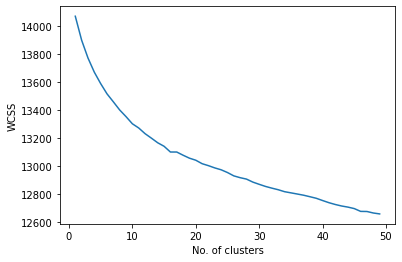

In [35]:
plt.plot(WCSS.keys(),WCSS.values())
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

In [29]:
def songs_in_cluster(N_clusters,df,song_matrix,song_name,n_recommendations):
    kmeans=KMeans(n_clusters=N_clusters,max_iter=1000,init='k-means++',random_state=1).fit(song_matrix)
    index_in_song=df.columns.to_list().index(song_name)
    #print(index_in_song)
    
    song_vector=song_matrix[index_in_song]   #song_vector contains genre score of each song
    #print(song_vector)
   
    all_songs_in_cluster=kmeans.predict(song_matrix)
    #print(len(all_songs_in_cluster))
    #print(all_songs_in_cluster)
    
    #finding songs which belong to same cluster as of song passed in song_name
    songs_in_selected_cluster=[X for X in range(len(all_songs_in_cluster)) 
                               if all_songs_in_cluster[X]==kmeans.predict([song_vector])]
    #print(len(songs_in_selected_cluster))
    
    song_cluster=song_matrix[songs_in_selected_cluster]
    #print(song_cluster)
    
    neighbors=NearestNeighbors(n_neighbors=n_recommendations)
    neighbors.fit(song_cluster)
    recommended_songs=neighbors.kneighbors([song_matrix[index_in_song]])
    #print(recommended_songs)
    
    songs=df.columns
    return[songs[X] for X in recommended_songs[1][0]]

In [30]:
#df.columns.to_list()
#df.columns.to_list().index(song_name)

In [31]:
songs_in_cluster(15,df,song_matrix,'song_5',5)

['song_2', 'song_209', 'song_207', 'song_311', 'song_101']